# 逻辑回归 Logistic Regression 

在此部分的练习中，您将构建一个逻辑回归模型以预测大学生入学情况。任务是建立给一个分类模型，基于两项考试的分数预测申请人的入学概率。

## 数据可视化 Visualizing the data 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "ex2data1.txt"
df_1 = pd.read_csv(path,names=['exam1','exam2','admitted'])

In [3]:
df_1.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exam1       100 non-null float64
exam2       100 non-null float64
admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


创建两个分数的散点图，并使用颜色编码来可视化，如果样本是正的（被录取）或负的（未被录取）。

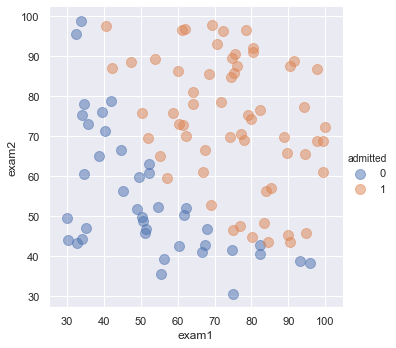

In [5]:
sns.set(style='darkgrid')

# scatter_kws参数*控制颜色*，透明度，点的大小
sns.lmplot(x='exam1',
           y='exam2',
           hue='admitted',
           data=df_1,
           fit_reg=False,
           scatter_kws={"alpha":0.5,"s":100}
          )
plt.show()

看起来在两类间，有一个清晰的决策边界。现在我们需要实现逻辑回归，那样就可以训练一个模型来预测结果。

### S型函数  simoid function

逻辑回归模型的假设是： 
$$
h_\theta \left( x \right)=g\left(\theta^{T}X \right)
$$

其中：

- $X$ 代表特征向量

- $g$ 代表逻辑函数**logistic function**或**S**形函数**Sigmoid function**

  ​	公式为： 
  $$
  g\left( z \right)=\frac{1}{1+{{e}^{-z}}}
  $$
  

In [6]:
# np.exp()函数：e的x幂次方
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

绘制S型函数图像

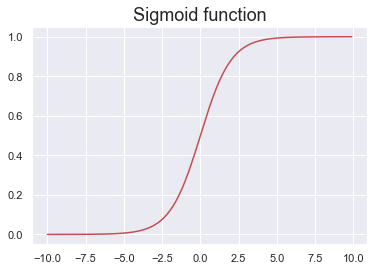

In [7]:
nums = np.arange(-10,10,step=0.1)
fig,ax = plt.subplots()
ax.plot(nums,sigmoid(nums),'r')

ax.set_title('Sigmoid function', fontsize=18)
plt.show()

## 代价函数 Cost function  

逻辑回归的代价函数：
$$
J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[{-{y}^{(i)}}\log \left( {h_\theta}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{h_\theta}\left( {{x}^{(i)}} \right) \right)]}
$$


其中：

$$
h_\theta\left( x \right)=g(\theta^TX)\\
g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\
$$

In [8]:
def computerCost(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y,np.log(1-sigmoid(X*theta.T)))
    
    return np.sum(first - second) / len(X)

与线性回归的预处理类似，并且执行逻辑回归程序

In [9]:
# 1.添加新的一列
df_1.insert(0,"first",value=1)

In [10]:
df_1.head()

,first,exam1,exam2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [11]:
# 2.初始化训练集X和目标变量y
cols_1 = df_1.shape[1]
X_1 = df_1.iloc[:,0:cols_1-1]
y_1 = df_1.iloc[:,cols_1-1:cols_1]

In [12]:
# 3.转化矩阵 并初始化θ矩阵
X_1 = np.matrix(X_1)
y_1 = np.matrix(y_1)

# theta = np.matrix([0,0,0])
theta_1 = np.matrix(np.zeros(cols_1-1))

In [13]:
# 4.检查相关参数的维度
X_1.shape,theta_1.shape,y_1.shape

((100, 3), (1, 3), (100, 1))

In [14]:
# 5.计算代价函数
computerCost(X=X_1,y=y_1,theta=theta_1)

0.6931471805599453

## 梯度下降 Gradient Descent

$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

求导后得到：

$$
\begin{array}{l}
\text { Repeat \{  } \\
\qquad \theta_j := \theta_j - \alpha \frac{1}{m}\sum\limits_{i=1}^{m}{{\left( {h_\theta}\left( \mathop{x}^{\left( i \right)} \right)-\mathop{y}^{\left( i \right)} \right)}}\mathop{x}_{j}^{(i)}
\\
\text { \} }
\end{array}\\
\text {(simultaneously update all)}
$$

### 计算梯度

In [15]:
def gradient(theta,X,y):
    # 初始化theta
    theta = np.matrix(theta)
    
    parameters = int(theta.shape[1])   # parameters=3
    grad = np.zeros(parameters)   # grad矩阵初始化 记录初始的梯度步长
    
    error = sigmoid(X*theta.T) - y
    for i in range(parameters):
        #error = sigmoid(X*theta.T) - y
        inner = np.multiply(error,X[:,i])
        grad[i] = np.sum(inner) / len(X)
     
    return grad

注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。

$$
\frac{\partial J(\theta)}{\partial \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}
$$

In [16]:
# gradient(X=X_1,y=y_1,theta=theta_1).
gradient(theta_1, X_1, y_1)

array([ -0.1       , -12.00921659, -11.26284221])

## 高级优化 Advanced Optimization

在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。

scipy中的optimize子包中提供了常用的最优化算法函数实现，我们可以直接调用这些函数完成我们的优化问题。


### fmin_tnc()

有约束的多元函数问题，提供梯度信息，使用截断牛顿法。


常用参数
1. `func`：优化的目标函数
2. `x0`：初值
3. `fprime`：提供优化函数func的梯度函数，不然优化函数func必须返回函数值和梯度，或者设置approx_grad=True
4. `approx_grad` :如果设置为True，会给出近似梯度
5. `args`：元组，是传递给优化函数的参数

#### 代码和测试代价函数

In [17]:
import scipy.optimize as opt
result_1 = opt.fmin_tnc(func=computerCost, 
                      x0=theta_1,
                      fprime=gradient,
                      args=(X_1, y_1)
                     )
result_1

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

- 测试代价函数

In [18]:
computerCost(X=X_1,y=y_1,theta=result_1[0])

0.20349770158947458

#### 用训练集预测和验证

逻辑回归模型的假设
$$
h_\theta \left( x \right)=g\left(\theta^{T}X \right)=\frac{1}{1+{{e}^{-\theta^{T}X}}}
$$

在逻辑回归中，我们预测：

- 当${h_\theta}\left( x \right)>=0.5$时，预测 $y=1$。

- 当${h_\theta}\left( x \right)<0.5$时，预测 $y=0$ 。

In [19]:
def predict(X,theta):
    P = sigmoid(X * theta.T)
    return [1 if i >= 0.5 else 0 for i in P]

In [20]:
theta_tnc = np.matrix(result_1[0])
predictions_1 = predict(X=X_1,theta=theta_tnc)   # 预测结果集
predictions_1[0:10]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1]

In [21]:
theta_1

matrix([[0., 0., 0.]])

In [22]:
# 对比目标变量y 计算精准度
# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
def accuracy(predictions,y):
    currectList = []
    for (a,b) in zip(predictions,y):
        if (a==1 and b==1) or (a==0 and b==0):
            currectList.append(1)
        else:
            currectList.append(0)
    accuracy = sum(map(int,currectList)) % len(currectList)  # 精准度
    return accuracy,currectList

In [23]:
acc_1_accuracy,acc_1_list = accuracy(predictions=predictions_1,y=y_1)
acc_1_list[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [24]:
print('fmin_tnc函数--精准度为{}%'.format(acc_1_accuracy))

fmin_tnc函数--精准度为89%


In [25]:
from sklearn.metrics import classification_report   #这个包是评价报告
print(classification_report(y_1,predictions_1))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



我们的逻辑回归分类器预测正确，如果一个学生被录取或没有录取，达到89%的精确度。不坏！记住，这是训练集的准确性。我们没有保持住了设置或使用交叉验证得到的真实逼近，所以这个数字有可能高于其真实值（这个话题将在以后说明）。

### minimize()

约束最小化多元标量函数

常用参数
1. `fun` ：优化的目标函数
2. `x0` ：初值，一维数组，shape (n,)
3. `args` ： 元组，可选，额外传递给优化函数的参数
4. `method`：求解的算法，选择TNC则和fmin_tnc()类似
5. `jac`：返回梯度向量的函数

#### 代码和测试代价函数

In [26]:
import scipy.optimize as opt
result_2 = opt.minimize(fun=computerCost,
                        x0=theta_1,
                        args=(X_1,y_1),
                        method='Newton-CG',
                        jac=gradient
                       )
result_2

     fun: 0.20349770334515793
     jac: array([-4.92670519e-06, -2.65440410e-04, -4.72795150e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 28
    njev: 239
  status: 0
 success: True
       x: array([-25.1578977 ,   0.20620423,   0.2014438 ])

In [27]:
theta_NCG = result_2.x
theta_NCG

array([-25.1578977 ,   0.20620423,   0.2014438 ])

- 测试代价函数

In [28]:
computerCost(X=X_1,y=y_1,theta=theta_NCG)

0.20349770334515793

#### 用训练集预测和验证

In [29]:
theta_NCG = np.matrix(theta_NCG)
predictions_2 = predict(X=X_1,theta=theta_NCG)
predictions_2[0:10]

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1]

In [30]:
acc_2_accuracy,acc_2_list = accuracy(predictions=predictions_2,y=y_1)
acc_2_list[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [31]:
print('Newton-CG--精准度为{}%'.format(acc_2_accuracy))

Newton-CG--精准度为89%


In [32]:
from sklearn.metrics import classification_report   #这个包是评价报告
print(classification_report(y_1,predictions_2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## 决策边界 decision boundary

决策边界为
$$
\theta^TX = 0  
$$

即 $$\theta_0+\theta_1⋅x_1+\theta_2⋅x_2=0$$
$$
x_2=-\frac{\theta_0}{\theta_2}-\frac{\theta_1}{\theta_2}⋅x_1
$$

In [33]:
theta_NCG = theta_NCG.A[0]
theta_tnc = theta_tnc.A[0]

In [34]:
theta_tnc

array([-25.16131863,   0.20623159,   0.20147149])

In [35]:
# tnc
coef_tnc = -(theta_tnc / theta_tnc[2] )
x_tnc = np.arange(130,step=1)
y_tnc = coef_tnc[0] + coef_tnc[1]*x_tnc

# NCG
theta_NCG = -(theta_NCG / theta_NCG[2] )
x_NCG = np.arange(130,step=1)
y_NCG = theta_NCG[0] + theta_NCG[1]*x_NCG

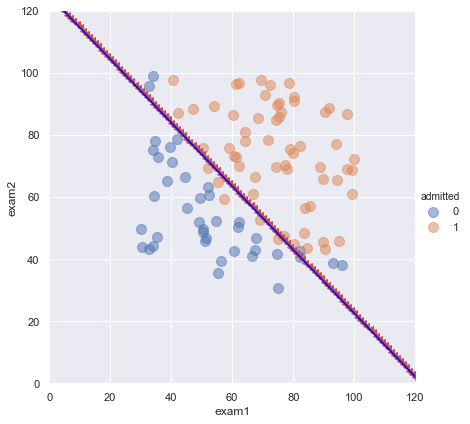

In [36]:
sns.set(style='darkgrid')

# scatter_kws参数*控制颜色*，透明度，点的大小
sns.lmplot(x='exam1',
           y='exam2',
           hue='admitted',
           data=df_1,
           height=6,
           fit_reg=False,
           scatter_kws={"alpha":0.5,"s":100}
          )
plt.plot(x_tnc, y_tnc, '<r')
plt.plot(x_NCG, y_NCG, 'blue')
plt.xlim(0,120)
plt.ylim(0,120)
plt.show()

# 正则化逻辑回归 Regularized logistic regression

在此部分的练习中，您将通过加入正则项提升逻辑回归算法。任务是你有一些芯片在两次测试中的测试结果。对于这两次测试，你想决定是否芯片要被接受或抛弃。

## 数据可视化 Visualizing the data

In [37]:
path = 'ex2data2.txt'
df_2 = pd.read_csv(path,names=['Test_1','Test_2','Accepted'])

In [38]:
df_2.head()

,Test_1,Test_2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


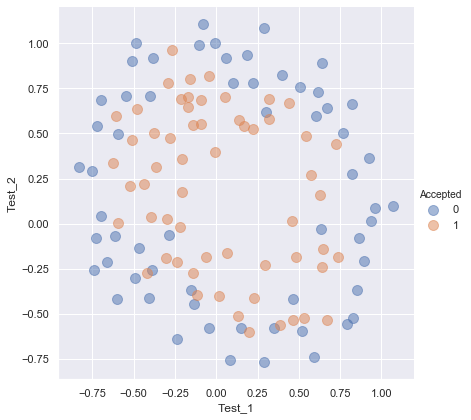

In [39]:
sns.lmplot(x='Test_1',
           y='Test_2',
           hue='Accepted',
           data=df_2,
           fit_reg=False,
           height=6,
           scatter_kws={"alpha":0.5,"s":100}
          )
plt.show()

## 特征映射 feature mapping

通过观察上图，我们注意到其中没有线性决策界限，来良好的区分两类数据。因此我们可以利用像线性逻辑回归这样方法从多项式中得到特征。

如果样本量多，逻辑回归问题很复杂，而原始特征只有$x_1,x_2$可以用多项式创建更多的特征$x_1、x_2、x_1x_2、x_1^2、x_2^2、... x_1^nx_2^n$。因为更多的特征进行逻辑回归时，得到的分割线可以是任意高阶函数的形状。

$$
\text { mapFeature }(x)=\left[\begin{array}{c}
1 \\
x_{1} \\
x_{2} \\
x_{1}^{2} \\
x_{1} x_{2} \\
x_{2}^{2} \\
x_{1}^{3} \\
\vdots \\
x_{1} x_{2}^{5} \\
x_{2}^{6}
\end{array}\right]
$$

In [40]:
x1 = df_2['Test_1']
x2 = df_2['Test_2']
x1.head()

0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
Name: Test_1, dtype: float64

In [41]:
# 1.添加新的一列
df_2.insert(3,'first',1)

In [42]:
df_2.head()

,Test_1,Test_2,Accepted,first
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


In [43]:
for i in range(5):# 多项式最高次为5次
    for j in range(5-i):
        df_2['F'+str(i)+str(j)] = np.power(x1,i) * np.power(x2,j)

In [44]:
# 删除原始数据Test_1和Test_2 
df_2.drop('Test_1',axis=1,inplace=True)
df_2.drop('Test_2',axis=1,inplace=True)

In [45]:
df_2.head()

,Accepted,first,F00,F01,F02,F03,F04,F10,F11,F12,F13,F20,F21,F22,F30,F31,F40
0,1,1,1.0,0.69956,0.489384,0.342354,0.239497,0.051267,0.035864,0.025089,0.017551,0.002628,0.001839,0.001286,0.000135,0.000094,0.000007
1,1,1,1.0,0.68494,0.469143,0.321335,0.220095,-0.092742,-0.063523,-0.043509,-0.029801,0.008601,0.005891,0.004035,-0.000798,-0.000546,0.000074
2,1,1,1.0,0.69225,0.479210,0.331733,0.229642,-0.213710,-0.147941,-0.102412,-0.070895,0.045672,0.031616,0.021886,-0.009761,-0.006757,0.002086
3,1,1,1.0,0.50219,0.252195,0.126650,0.063602,-0.375000,-0.188321,-0.094573,-0.047494,0.140625,0.070620,0.035465,-0.052734,-0.026483,0.019775
4,1,1,1.0,0.46564,0.216821,0.100960,0.047011,-0.513250,-0.238990,-0.111283,-0.051818,0.263426,0.122661,0.057116,-0.135203,-0.062956,0.069393


### 公共参数

In [46]:
degree = 6 
learningRate = 1

### 映射函数

In [47]:
# 整理下可以得出多项式映射函数
path = 'ex2data2.txt'
df_2 = pd.read_csv(path,names=['Test_1','Test_2','Accepted'])

def mapping(x1,x2,degree):
    degree = degree + 1   # 从1开始
    for i in range(degree):
        for j in range(degree-i):
            df_2['F'+str(i)+str(j)] = np.power(x1,i) * np.power(x2,j)
    return  df_2

In [48]:
df_2.drop('Test_1',axis=1,inplace=True)
df_2.drop('Test_2',axis=1,inplace=True)

In [49]:
mapping(x1,x2,degree).head()

,Accepted,F00,F01,F02,F03,F04,F05,F06,F10,F11,...,F30,F31,F32,F33,F40,F41,F42,F50,F51,F60
0,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


## 正则化代价函数 regularized cost

正则化的逻辑回归模型

$$
J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {h_\theta}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{h_\theta}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}
$$

其中：
$$
{h_\theta}\left( x \right)=g({\theta^T}X)
$$

In [50]:
def computerCostReg(theta,X,y,Rate=1):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second = np.multiply(1-y, np.log(1-sigmoid(X*theta.T)))
    reg = (Rate / (2*len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(first - second) / len(X) + reg

请注意等式中的"reg" 项。还注意到另外的一个“Rate”参数。这是一种超参数$\lambda$，用来控制正则化项。

- 与线性回归的预处理类似，并且执行逻辑回归程序

In [51]:
df_2.head()

,Accepted,F00,F01,F02,F03,F04,F05,F06,F10,F11,...,F30,F31,F32,F33,F40,F41,F42,F50,F51,F60
0,1,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [52]:
df_2.shape[1]

29

In [53]:
# 2.初始化训练集X和目标变量y
cols_2 = df_2.shape[1]
X_2 = df_2.iloc[:,1:cols_2]
y_2 = df_2.iloc[:,0:1]

In [54]:
# 3.转化矩阵 并初始化θ矩阵
X_2 = np.matrix(X_2)
y_2 = np.matrix(y_2)

theta_2 = np.matrix(np.zeros(cols_2-1))

In [55]:
# 4.检查相关参数的维度
X_2.shape,theta_2.shape,y_2.shape

((118, 28), (1, 28), (118, 1))

让我们初始学习率到一个合理值。果有必要的话（即如果惩罚太强或不够强）,我们可以之后再调整

In [56]:
# 5.计算正则化代价函数
computerCostReg(X=X_2,y=y_2,theta=theta_2,Rate=learningRate)

0.6931471805599454

## 梯度下降 Gradient Descent

  如果我们要**使用梯度下降法**令这个代价函数最小化，因为我们未对$\theta_0$进行正则化，所以梯度下降算法将分两种情形：
$$
\begin{array}{l}
\text { Repeat \{  } \\
\qquad 
{\theta_0}:={\theta_0}-a[\frac{1}{m}\sum\limits_{i=1}^{m}{(({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{0}^{(i)}})]
\\
\qquad 
{\theta_j}:={\theta_j}-a[\frac{1}{m}\sum\limits_{i=1}^{m}{(({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{j}^{\left( i \right)}}+\frac{\lambda }{m}{\theta_j}]
\\
\qquad(j = 1,2,3,...,n)  \\
\text { \} }
\end{array}
$$

​	对上面的算法中$ j=1,2,...,n$ 时式子化简可得：

$$
{\theta_j}:={\theta_j}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}})x_{j}^{\left( i \right)}}
$$


### 正则化梯度 regularized gradient

In [57]:
def gradientReg(theta,X,y,Rate=1):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    #paraters = int(theta_2.ravel().shape[1])
    paraters = theta_2.shape[1]
    grad = np.zeros(paraters)
    
    error = sigmoid(X*theta.T) - y
    
    for i in range(paraters):
        inner = np.multiply(error,X[:,i])
        
        if(i==0):
            grad[i] = np.sum(inner) / len(X)
        else:
            grad[i] = (np.sum(inner) / len(X)) + (Rate / len(X)) * theta[:,i]
    return grad

注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。

$$
\frac{\partial J(\theta)}{\partial \theta_{0}}=\frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)}) x_{j}^{(i)} \quad \text { for } j = 0
$$

$$
\frac{\partial J(\theta)}{\partial \theta_{j}}=\left(\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right)+\frac{\lambda}{m} \theta_{j} \quad \text { for } j \geq 1
$$

In [58]:
gradientReg(X=X_2,y=y_2,theta=theta_2,Rate=learningRate)

array([8.47457627e-03, 7.77711864e-05, 3.76648474e-02, 2.34764889e-02,
       3.93028171e-02, 3.10079849e-02, 3.87936363e-02, 1.87880932e-02,
       1.15013308e-02, 8.19244468e-03, 3.09593720e-03, 4.47629067e-03,
       1.37646175e-03, 5.03446395e-02, 7.32393391e-03, 1.28600503e-02,
       5.83822078e-03, 7.26504316e-03, 1.83559872e-02, 2.23923907e-03,
       3.38643902e-03, 4.08503006e-04, 3.93486234e-02, 4.32983232e-03,
       6.31570797e-03, 1.99707467e-02, 1.09740238e-03, 3.10312442e-02])

## 高级优化 Advanced Optimization

### 代码和测试代价函数

- fmin_tnc()

In [59]:
import scipy.optimize as opt
result_1 = opt.fmin_tnc(func=computerCostReg,
                        x0=theta_2,
                        fprime=gradientReg,
                        args=(X_2,y_2,learningRate)
                       )
theta_tnc = np.matrix(result_1[0])
theta_tnc

matrix([[ 1.27271027,  1.18111686, -1.43166929, -0.17516292, -1.19271298,
         -0.45645981, -0.92467487,  0.62529965, -0.91743189, -0.35725404,
         -0.27469165, -0.29539513, -0.1438915 , -2.01987399, -0.36553118,
         -0.61558554, -0.27778951, -0.32742405,  0.12393227, -0.05098418,
         -0.04466178,  0.0155576 , -1.45817009, -0.20603299, -0.2924487 ,
         -0.24217841,  0.02779373, -1.04319154]])

- minimize()

In [60]:
result_2 = opt.minimize(fun=computerCostReg,
                        x0=theta_2,
                        args=(X_2,y_2),
                        method='Newton-CG',
                        jac = gradientReg
)
theta_NCG = np.matrix(result_2.x)
theta_NCG.shape  #(1, 28)
theta_NCG

matrix([[ 1.27274087,  1.18108917, -1.43166683, -0.17513041, -1.19281632,
         -0.45635739, -0.92465249,  0.62527245, -0.91742458, -0.35723948,
         -0.27470635, -0.29537734, -0.1438868 , -2.01996353, -0.36553562,
         -0.61555624, -0.27778484, -0.32737974,  0.12400638, -0.05098872,
         -0.04473038,  0.01556682, -1.45815632, -0.20600693, -0.2924311 ,
         -0.24218824,  0.02777133, -1.0432019 ]])

### 用训练集预测和验证

- fmin_tnc()

In [61]:
predictions_1 = predict(X=X_2,theta=theta_tnc)
predictions_1[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

In [62]:
acc_1_accuracy,acc_1_list = accuracy(predictions=predictions_1,y=y_2)
print('fmin_tnc--精准度为{}%'.format(acc_1_accuracy))

fmin_tnc--精准度为98%


- minimize()

In [63]:
predictions_2 = predict(X=X_2,theta=theta_NCG)
predictions_2[:25]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [64]:
acc_2_accuracy,acc_2_list = accuracy(predictions=predictions_2,y=y_2)
print('minimize--精准度为{}%'.format(acc_2_accuracy))

minimize--精准度为98%


In [65]:
from sklearn.metrics import classification_report   #这个包是评价报告
print(classification_report(y_2,predictions_2))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



### 利用scikit-learn库解决

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [67]:
#poly_log_reg = PolynomialLogisticRegression(degree=6)
#poly_log_reg.fit(X_2,y_2)
#poly_log_reg.score(X_2,y_2)

## 非线性的决策边界

决策边界为
$$
\theta^TX = 0  
$$

In [68]:
df_2['Accepted'].isin([1])

0       True
1       True
2       True
3       True
4       True
       ...  
113    False
114    False
115    False
116    False
117    False
Name: Accepted, Length: 118, dtype: bool

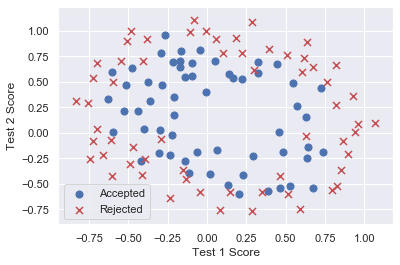

In [69]:
path = 'ex2data2.txt'
df_2 = pd.read_csv(path,names=['Test_1','Test_2','Accepted'])

positive = df_2[df_2['Accepted'].isin([1])]   # pandas.isin用来清洗数据   1->True   0->False
negative = df_2[df_2['Accepted'].isin([0])]

fig, ax = plt.subplots()
ax.scatter(positive['Test_1'], positive['Test_2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test_1'], negative['Test_2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [70]:
def f(u,v,degree):
    degree = degree + 1
    counts = 0
    temp = []
    
    for i in range(degree):
        for j in range(degree-i):
            temp.insert(counts,np.power(u,i) * np.power(v,j))
            counts = counts + 1
    return temp

In [71]:
# np.linspace()在指定的间隔范围内返回均匀间隔的数字。
u = np.linspace(-1,1.25,100)
v = np.linspace(-1,1.25,100)
z = np.zeros((100,100))


for i in range(100):
    for j in range(100):
        z[i, j]=np.sum(np.multiply(np.array(f(u[i], v[j], degree)), theta_tnc))

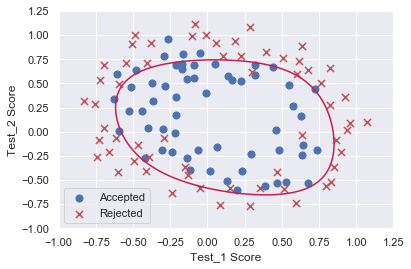

In [72]:
path = 'ex2data2.txt'
df_2 = pd.read_csv(path,names=['Test_1','Test_2','Accepted'])
positive = df_2[df_2['Accepted'].isin([1])]
negative = df_2[df_2['Accepted'].isin([0])]
fig, ax = plt.subplots()
ax.scatter(positive['Test_1'], positive['Test_2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test_1'], negative['Test_2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test_1 Score')
ax.set_ylabel('Test_2 Score')


ax.contour(u,v,z,0)  # 绘制等高线图
plt.show()

- learningRate=0,没有正则化，过拟合了
- learningRate=1 √
- learningRate=100,欠拟合

## 补充: plt.contourf() 函数详解

plt.contour()和plt.contourf()
1. 绘制三维图
2. 其中前两个参数x和y：两个等长一维数组
3. 第三个参数z： 二维数组（表示平面点xi, yi映射的函数值）。

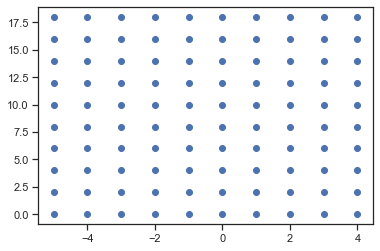

In [73]:
# 1. 生成数据点
x = np.arange(-5,5,1)
y = np.arange(0,20,2)
xx, yy = np.meshgrid(x,y)  # np.meshgrid() 生成网格矩阵

sns.set(style='ticks')
fig, ax = plt.subplots()
ax.scatter(xx,yy)
plt.show()

In [74]:
# 2.对不同类的数据进行标记，即生成Z
z = np.square(xx) - yy > 0

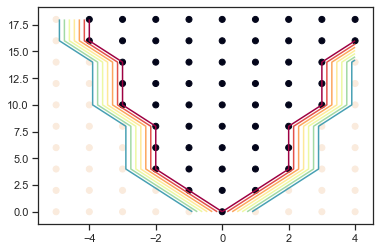

In [75]:
# 3.生层边界图
plt.contour(xx,yy,z,cmap=plt.cm.Spectral)  #plt.cm.Spectral在这的意思就是颜色会随Z的值变化
plt.scatter(xx,yy,c=z)
plt.show()

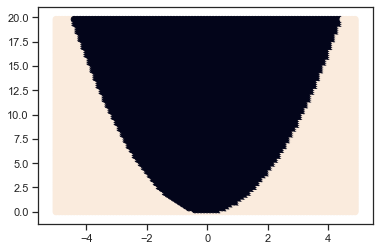

In [76]:
# 如果点设置得更密集一点，分界处会更光滑，可以看到完整的抛物线
x = np.arange(-5, 5, 0.1)
y = np.arange(0, 20, 0.2)
xx, yy = np.meshgrid(x, y)

z = np.square(xx) - yy > 0

plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
plt.scatter(xx, yy, c=z)
plt.show()